In [1]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Positive_tensors.zip 

--2020-03-02 06:32:14--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Positive_tensors.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2598656062 (2.4G) [application/zip]
Saving to: ‘Positive_tensors.zip’

Positive_tensors.zi 100%[===================>]   2.42G  23.6MB/s    in 1m 41s  

2020-03-02 06:34:01 (24.4 MB/s) - ‘Positive_tensors.zip’ saved [2598656062/2598656062]



In [0]:
!unzip -q -o Positive_tensors.zip 

In [5]:
! wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Negative_tensors.zip

--2020-03-02 06:42:24--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Negative_tensors.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2111408108 (2.0G) [application/zip]
Saving to: ‘Negative_tensors.zip’

Negative_tensors.zi 100%[===================>]   1.97G  29.0MB/s    in 69s     

2020-03-02 06:43:33 (29.3 MB/s) - ‘Negative_tensors.zip’ saved [2111408108/2111408108]



In [0]:
!unzip -q Negative_tensors.zip

In [7]:
!pip install torchvision

In [8]:
# These are the libraries will be used for this lab.
import torchvision.models as models
from PIL import Image
import pandas
from torchvision import transforms
import torch.nn as nn
import time
import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
import h5py
import os
import glob
torch.manual_seed(0)

In [0]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os

In [13]:
# Create your own dataset object

class Dataset(Dataset):

    # Constructor
    def __init__(self,transform=None,train=True):
        directory="/content"
        positive="Positive_tensors"
        negative='Negative_tensors'

        positive_file_path=os.path.join(directory,positive)
        negative_file_path=os.path.join(directory,negative)
        positive_files=[os.path.join(positive_file_path,file) for file in os.listdir(positive_file_path) if file.endswith(".pt")]
        negative_files=[os.path.join(negative_file_path,file) for file in os.listdir(negative_file_path) if file.endswith(".pt")]
        number_of_samples=len(positive_files)+len(negative_files)
        self.all_files=[None]*number_of_samples
        self.all_files[::2]=positive_files
        self.all_files[1::2]=negative_files 
        # The transform is goint to be used on image
        self.transform = transform
        #torch.LongTensor
        self.Y=torch.zeros([number_of_samples]).type(torch.LongTensor)
        self.Y[::2]=1
        self.Y[1::2]=0
        
        if train:
            self.all_files=self.all_files[0:30000]
            self.Y=self.Y[0:30000]
            self.len=len(self.all_files)
        else:
            self.all_files=self.all_files[30000:]
            self.Y=self.Y[30000:]
            self.len=len(self.all_files)     
       
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
               
        image=torch.load(self.all_files[idx])
        y=self.Y[idx]
                  
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y
    
print("done")

done


In [12]:
%pwd

'/content'

In [14]:
train_dataset = Dataset(train=True)
validation_dataset = Dataset(train=False)
print("done")

done


In [15]:
# Step 1: Load the pre-trained model resnet18

# Type your code here
import torchvision.models as models
model =models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [16]:
# Step 2: Set the parameter cannot be trained for the pre-trained model
model.requires_grad=False

# Type your code here
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
model.fc=nn.Linear(512,2)

In [18]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
torch.save(model,'/content/model.pt')

In [21]:
torch.load('/content/model.pt')

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
# Step 1: Create the loss function

# Type your code here
criterion=nn.CrossEntropyLoss()

In [0]:
import torch.utils.data
train_loader=DataLoader(dataset=train_dataset,batch_size=100)
validation_loader=DataLoader(dataset=validation_dataset,batch_size=100)

In [0]:
optimizer = torch.optim.Adam([parameters  for parameters in model.parameters() if parameters.requires_grad],lr=0.001)

In [0]:
n_epochs=1
loss_list=[]
accuracy_list=[]
mis_samples=[]
correct=0
N_test=len(validation_dataset)
N_train=len(train_dataset)
start_time = time.time()
#n_epochs


In [0]:
Loss=0
i=0
epoch=0
start_time = time.time()


In [29]:
i=0
print('training...\n')
print(str(time.time()))
for x, y in train_loader:

    model.train() 
    i+=1
    print(i,end=', ')
    #clear gradient 
    optimizer.zero_grad()

    #make a prediction 
    z=model(x)

    # calculate loss 
    loss=criterion(z,y)

    # calculate gradients of parameters 
    loss.backward()

    # update parameters 
    optimizer.step()

    loss_list.append(loss.data)


training...

1583132573.681349
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 21

In [0]:
torch.save(model,'/content/model.pt')


In [31]:

correct=0
i1=0
epoch=0
print('\nEvaluating...\n')
print(str(time.time()))
for x_test, y_test in validation_loader:
    # set model to eval 
    model.eval()
    i1+=1
    print (i1,correct,end=', ')        
    #make a prediction 
    z=model(x_test)
    print (i1,correct,end=', ')        

    #find max 
    _,yhat=torch.max(z.data,1)
    print (i1,correct,end=', ')        
    #Calculate misclassified  samples in mini-batch 
    #hint +=(yhat==y_test).sum().item()
    correct+=(yhat==y_test).sum().item()
    print (i1,correct)   
    #if(i1>=2):
        #break


Evaluating...

1583140558.505537
1 0, 1 0, 1 0, 1 99
2 99, 2 99, 2 99, 2 197
3 197, 3 197, 3 197, 3 297
4 297, 4 297, 4 297, 4 397
5 397, 5 397, 5 397, 5 496
6 496, 6 496, 6 496, 6 595
7 595, 7 595, 7 595, 7 695
8 695, 8 695, 8 695, 8 794
9 794, 9 794, 9 794, 9 893
10 893, 10 893, 10 893, 10 992
11 992, 11 992, 11 992, 11 1092
12 1092, 12 1092, 12 1092, 12 1191
13 1191, 13 1191, 13 1191, 13 1290
14 1290, 14 1290, 14 1290, 14 1390
15 1390, 15 1390, 15 1390, 15 1490
16 1490, 16 1490, 16 1490, 16 1590
17 1590, 17 1590, 17 1590, 17 1690
18 1690, 18 1690, 18 1690, 18 1790
19 1790, 19 1790, 19 1790, 19 1889
20 1889, 20 1889, 20 1889, 20 1989
21 1989, 21 1989, 21 1989, 21 2088
22 2088, 22 2088, 22 2088, 22 2188
23 2188, 23 2188, 23 2188, 23 2288
24 2288, 24 2288, 24 2288, 24 2387
25 2387, 25 2387, 25 2387, 25 2487
26 2487, 26 2487, 26 2487, 26 2586
27 2586, 27 2586, 27 2586, 27 2686
28 2686, 28 2686, 28 2686, 28 2786
29 2786, 29 2786, 29 2786, 29 2886
30 2886, 30 2886, 30 2886, 30 2986
31 29

In [32]:
accuracy=correct/N_test

accuracy_list.append(accuracy)
accuracy

0.9942

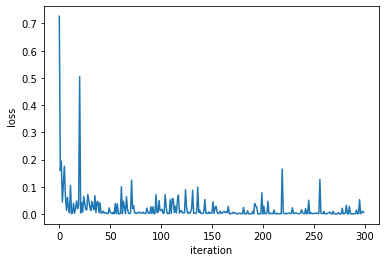

In [33]:
plt.plot(loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()


In [34]:
plt.savefig('/content/plotaccuracy.png')

<Figure size 432x288 with 0 Axes>

In [50]:
i2=0
mis_samples=[]
validation_loader_1=DataLoader(dataset=validation_dataset,batch_size=1)
for x_test, y_test in validation_loader_1:
    # set model to eval 
    model.eval()
    #make a prediction 
    z=model(x_test)

    #find max 
    _,yhat=torch.max(z.data,1)
    i2+=1
    #if(i2%100==0):
        #print (i2,end=', ')

    #Calculate misclassified  samples in mini-batch 
    #hint +=(yhat==y_test).sum().item()
    correct+=(yhat==y_test).sum().item()
    if(yhat!=y_test):
        mis_samples.append([x_test,y_test,i2])
        print('\n',len(mis_samples),str(x_test.shape),str(y_test.shape),i2)
    if(len(mis_samples)>=5):
        break



 1 torch.Size([1, 3, 224, 224]) torch.Size([1]) 74

 2 torch.Size([1, 3, 224, 224]) torch.Size([1]) 148

 3 torch.Size([1, 3, 224, 224]) torch.Size([1]) 156

 4 torch.Size([1, 3, 224, 224]) torch.Size([1]) 500

 5 torch.Size([1, 3, 224, 224]) torch.Size([1]) 564


In [48]:
mis_samples

[[tensor([[[[1.4098, 1.1358, 0.9817,  ..., 1.7523, 1.7523, 1.7523],
            [1.3413, 1.0844, 0.9132,  ..., 1.7694, 1.7694, 1.7694],
            [1.5468, 1.3070, 1.1187,  ..., 1.7694, 1.7694, 1.7694],
            ...,
            [1.7694, 1.7694, 1.7694,  ..., 1.6153, 1.6153, 1.6153],
            [1.8037, 1.8037, 1.8037,  ..., 1.6153, 1.6153, 1.6153],
            [1.8379, 1.8550, 1.8379,  ..., 1.6153, 1.6153, 1.6153]],
  
           [[1.5182, 1.2381, 1.0805,  ..., 1.8683, 1.8683, 1.8683],
            [1.4482, 1.1856, 1.0105,  ..., 1.8859, 1.8859, 1.8859],
            [1.6583, 1.4132, 1.2206,  ..., 1.8859, 1.8859, 1.8859],
            ...,
            [1.8859, 1.8859, 1.8859,  ..., 1.7283, 1.7283, 1.7283],
            [1.9209, 1.9209, 1.9209,  ..., 1.7283, 1.7283, 1.7283],
            [1.9559, 1.9734, 1.9559,  ..., 1.7283, 1.7283, 1.7283]],
  
           [[1.6117, 1.3328, 1.1759,  ..., 1.9951, 1.9951, 1.9951],
            [1.5420, 1.2805, 1.1062,  ..., 2.0125, 2.0125, 2.0125],
      